In [1]:
# pip install pandas, matplotlib, seaborn, scikit-learn, joblib

import pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [11]:
df = pd.read_csv('breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
print(df.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [14]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

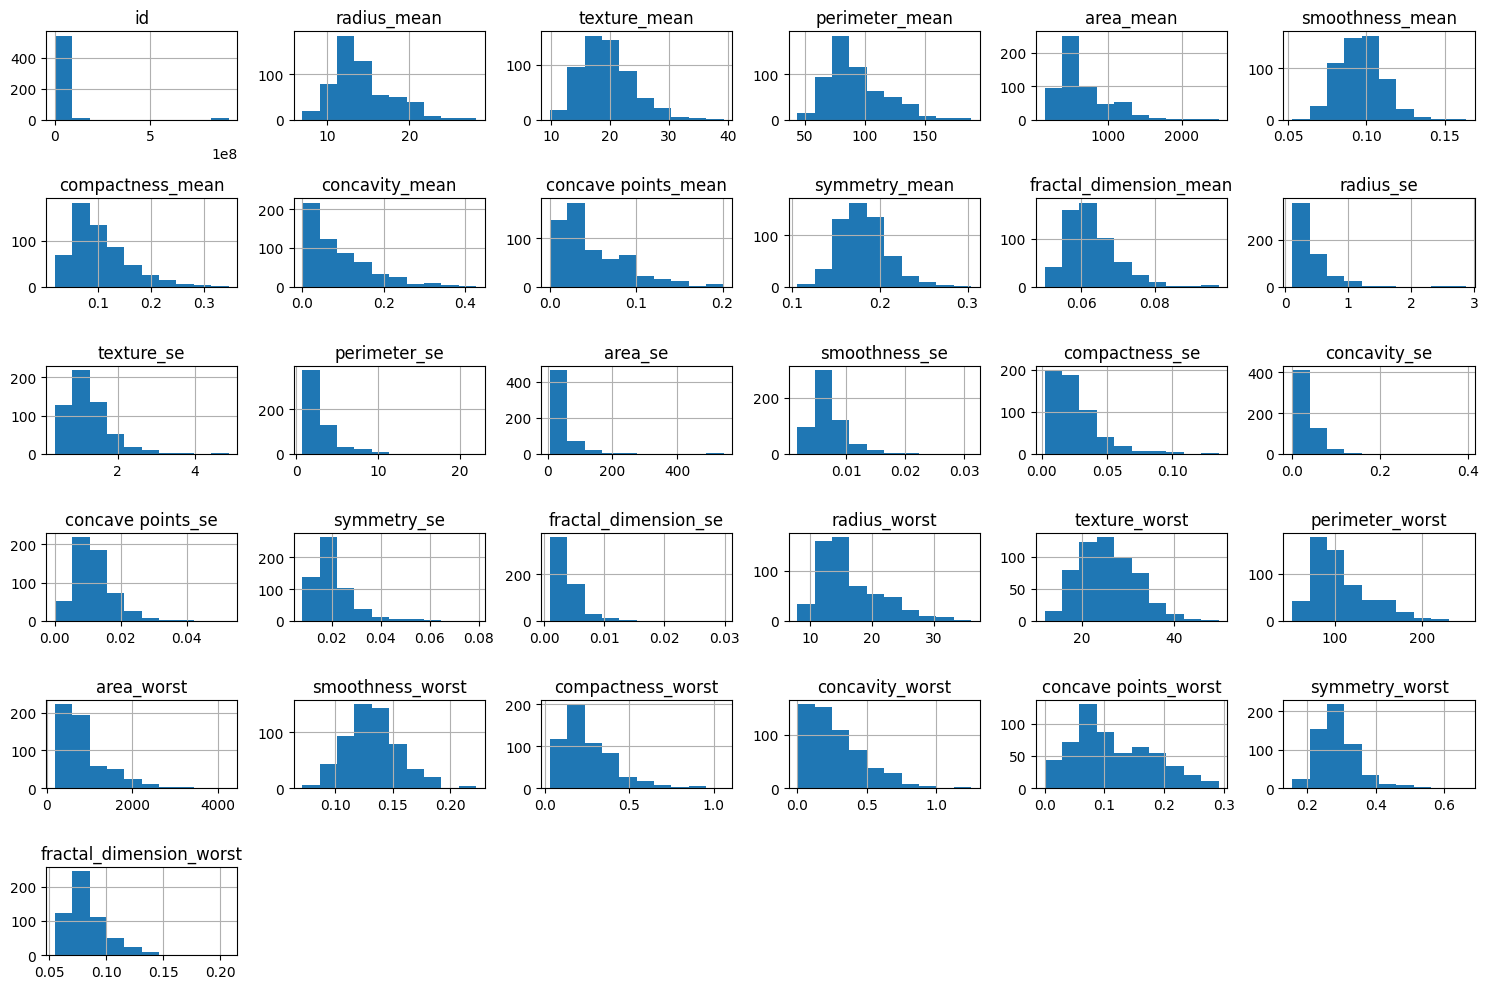

In [16]:
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols].hist(figsize=(15,10))
plt.tight_layout()
plt.show()

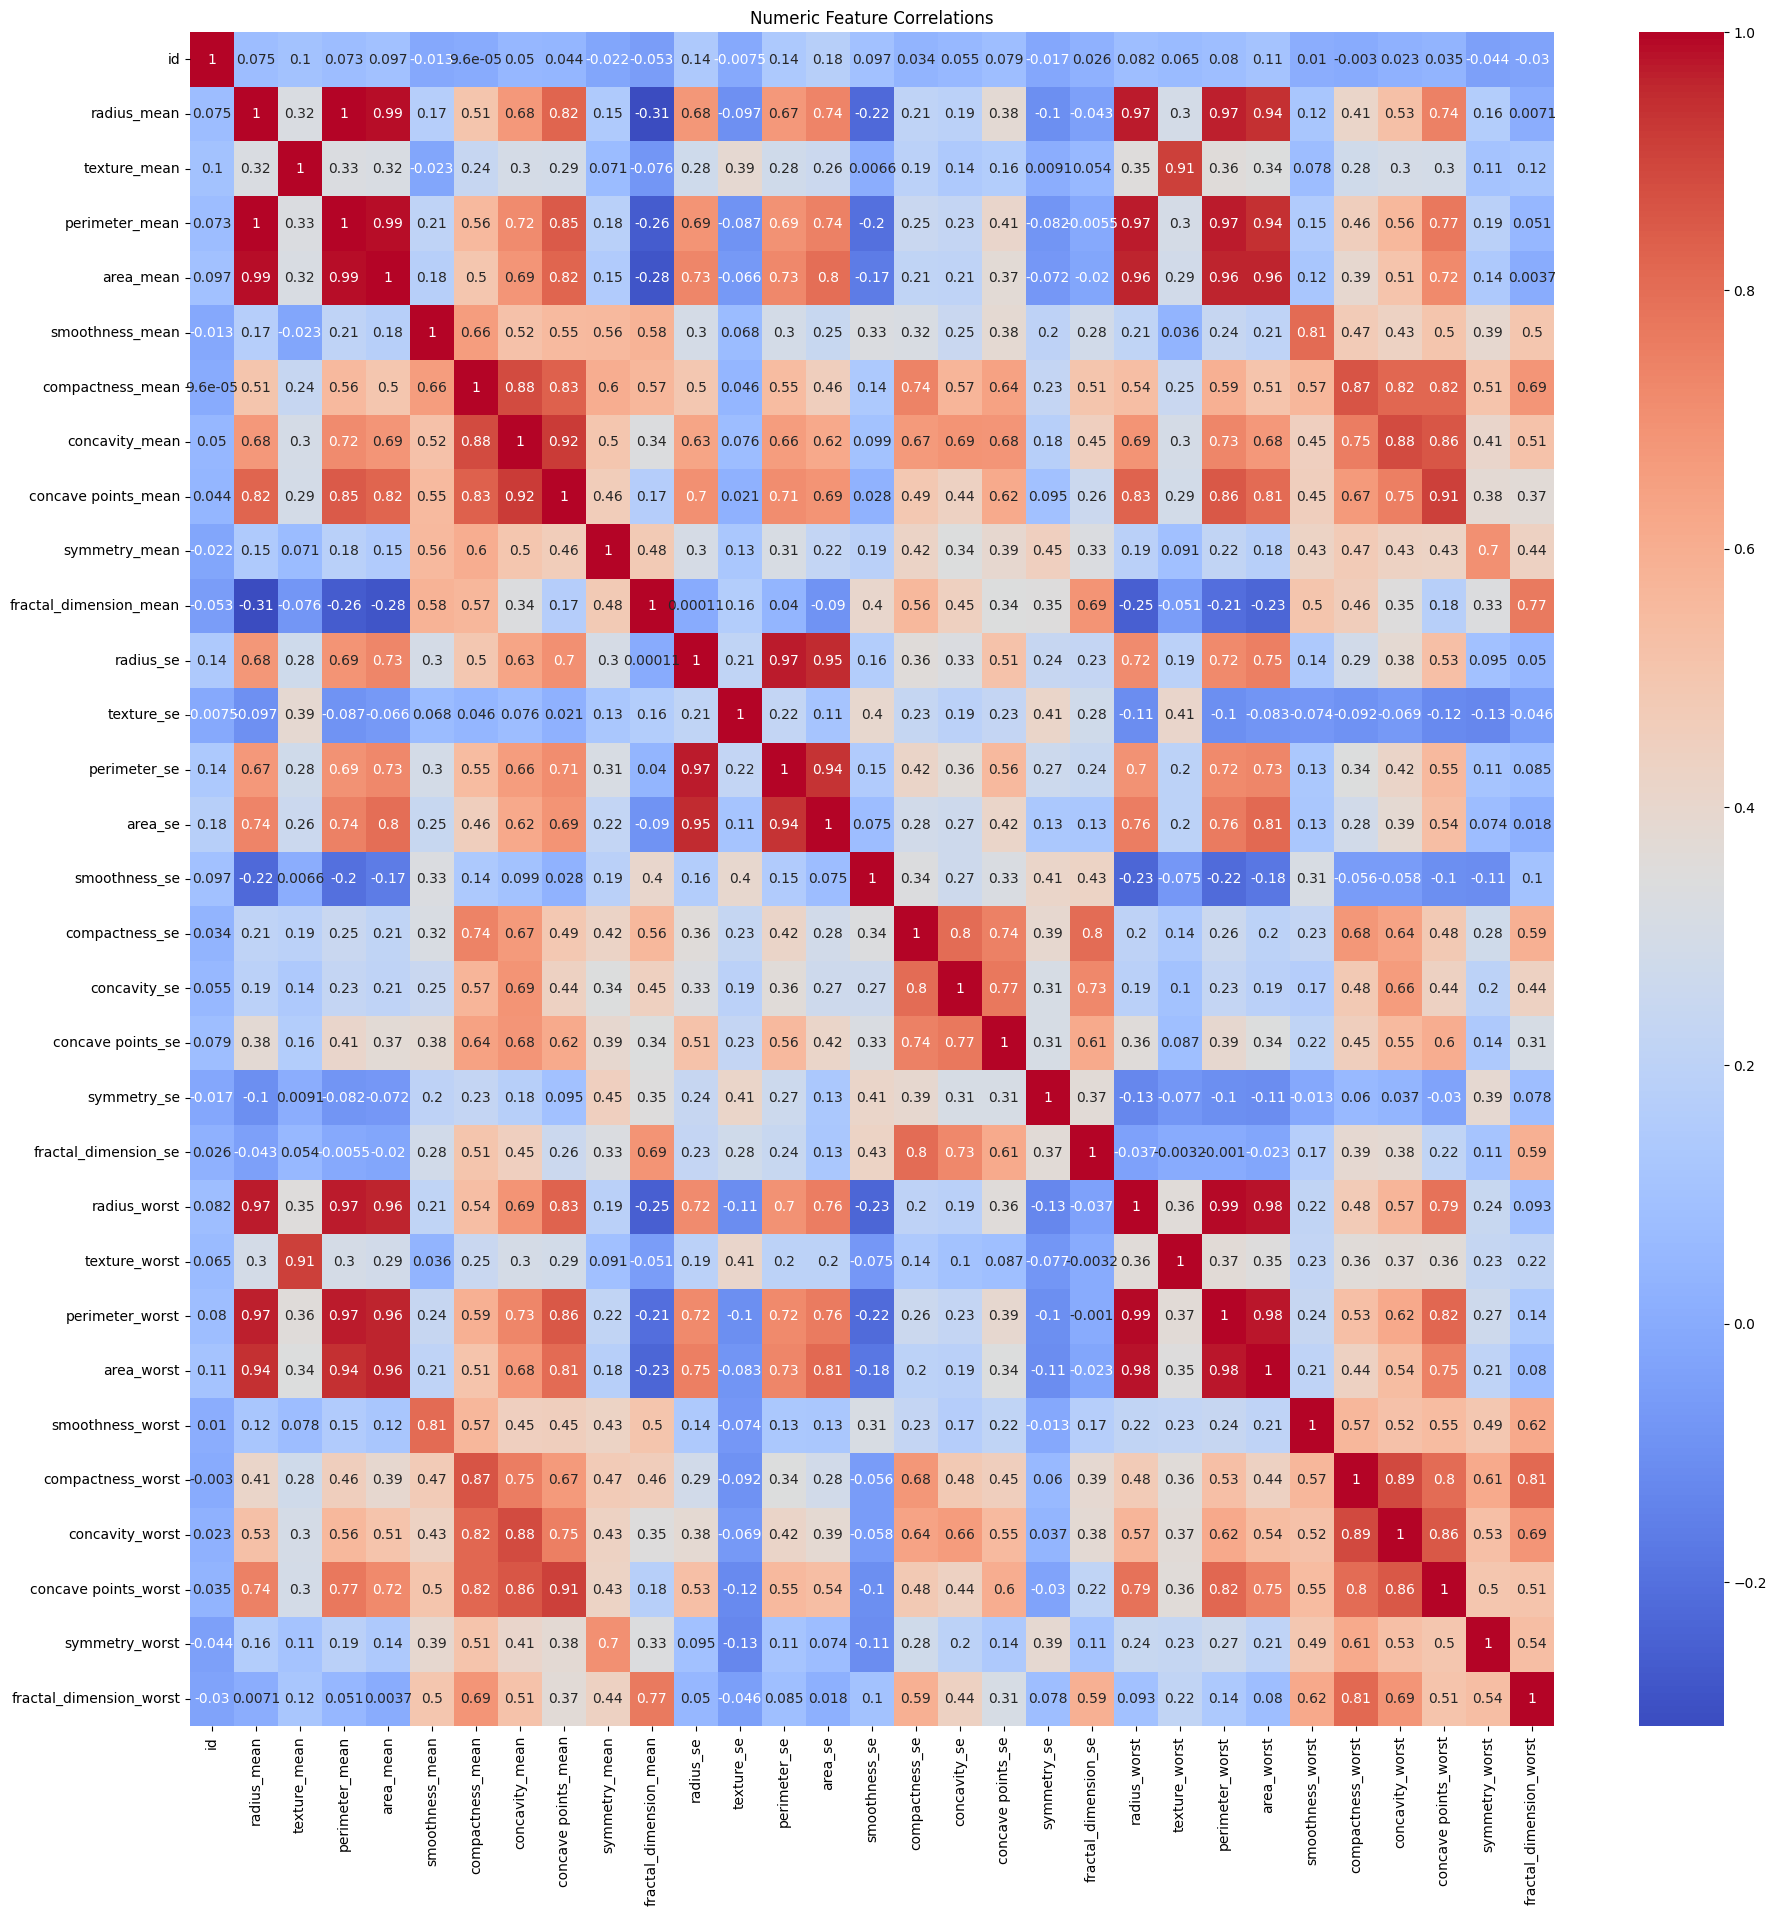

In [25]:
plt.figure(figsize=(22,22))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Numeric Feature Correlations')
plt.show()

In [26]:
cat_cols = df.select_dtypes(include='object').columns.tolist() #one-hot encoding
if 'diagnosis' in cat_cols:
    cat_cols.remove('diagnosis')

In [30]:
x = df.drop('diagnosis', axis=1)
y = df['diagnosis'].map({'M': 1, 'B': 0}) #0: no disease, 1: disease

In [31]:
x = pd.get_dummies(x, columns=cat_cols)
print("Final feature columns:", x.columns)

Final feature columns: Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

lr_model = LogisticRegression() #giving admission to a new student
lr_model.fit(x_train_scaled, y_train) #main training step

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [36]:
y_pred_lr = lr_model.predict(x_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



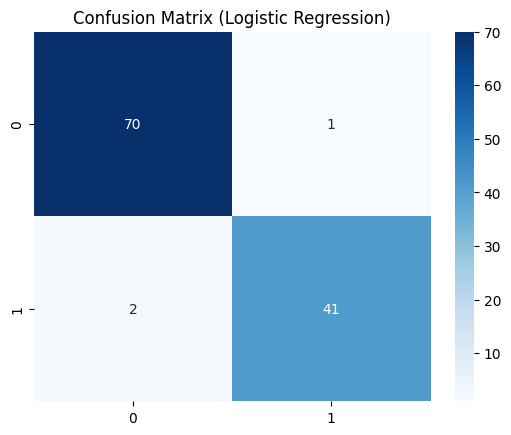

In [37]:
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

In [38]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_scaled, y_train)
y_pred_rf = rf_model.predict(x_test_scaled)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.9649122807017544


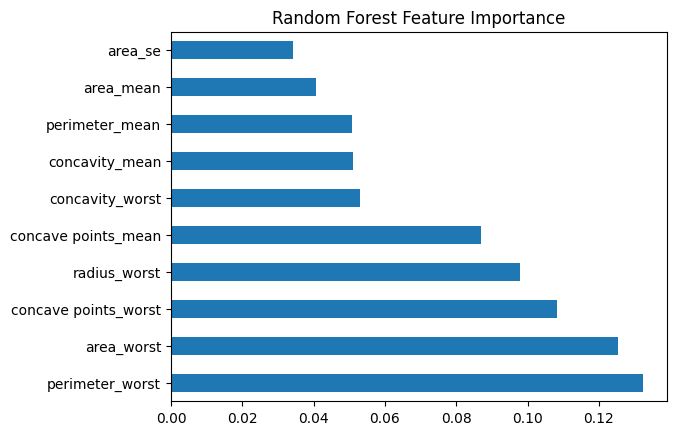

In [39]:
feat_imp = pd.Series(rf_model.feature_importances_, index=x.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.title('Random Forest Feature Importance')
plt.show()

In [40]:
import joblib
joblib.dump(rf_model, 'breast_cancer_rf_model.pkl')
joblib.dump(scaler, 'breast_cancer_scaler.pkl')

['breast_cancer_scaler.pkl']

In [41]:
sample = x.head(1)
sample.to_csv('breast_cancer_user_template.csv', index=False)
print("User template saved as 'breast_cancer_user_template.csv'.")

User template saved as 'breast_cancer_user_template.csv'.


In [54]:
import joblib
import pandas as pd

df2 = pd.read_csv('breast-cancer.csv')
#Getting columns list from training dataframe
numeric_cols2 = df2.select_dtypes(include='number').columns.tolist()
cat_cols2 = df2.select_dtypes(include='object').columns.tolist()
bool_cols2 = df2.select_dtypes(include='bool').columns.tolist()

#Dropping extra columns from df2 to avoid errors
numeric_cols2 = [col for col in numeric_cols2 if col in df2.columns]
cat_cols2 = [col for col in cat_cols2 if col in df2.columns]
bool_cols2 = [col for col in bool_cols2 if col in df2.columns]

#Fill the missing numeric column & cat column
df2[numeric_cols2] = df2[numeric_cols2].fillna(df2[numeric_cols2].mean())

for col in cat_cols2:
    df2[col] = df2[col].fillna('Unknown')

for col in bool_cols2:
    df2[col] = df2[col].astype(int)

#One-hot encode categorical columns
df2_encoded = pd.get_dummies(df2, columns=cat_cols2)

#Align columns
df2_encoded = df2_encoded.reindex(columns=x.columns, fill_value = 0)

#Scale data
scaler = joblib.load('breast_cancer_scaler.pkl')
df2_scaled = scaler.transform(df2_encoded)

#Prediction
model = joblib.load('breast_cancer_rf_model.pkl')
preds = model.predict(df2_scaled)
df2['Breast_Cancer_Prediction'] = preds

#Show result
print(df2)
print(df2['Breast_Cancer_Prediction'].value_counts())

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa